<a href="https://colab.research.google.com/github/jvrupp/EstatisticaML/blob/main/CursoDeEstatisticaCorrela%C3%A7aoERegressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Covariância, coeficiente de correlação e determinação

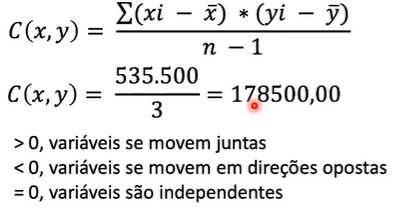

Coeficiente de correlacao:
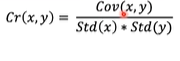 

cr = 0 nao existe correlacao
cr ->>1 exte correlcao alta
cr ->>-1 existe correlcao reversa alta
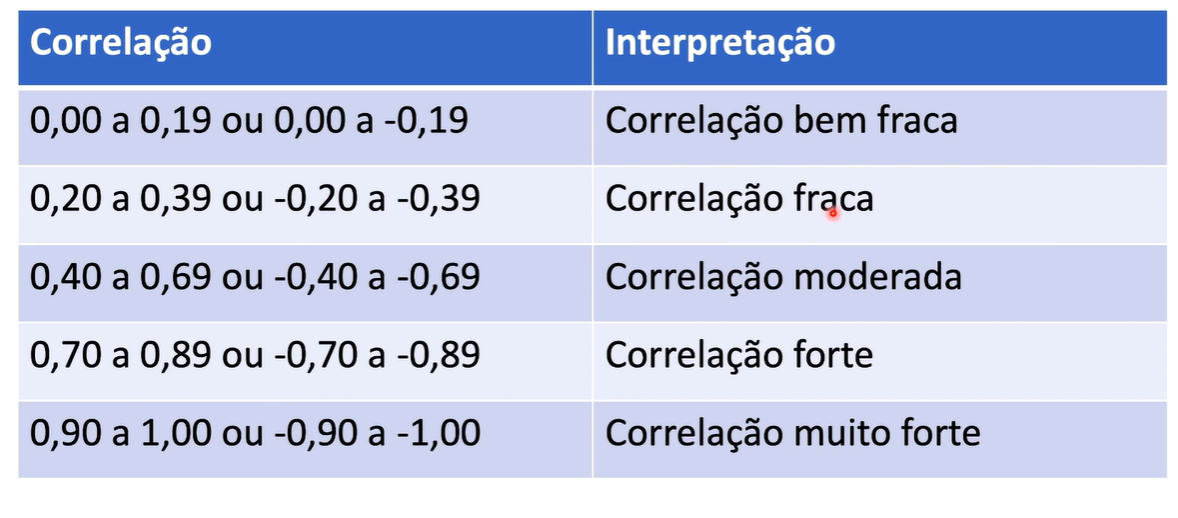

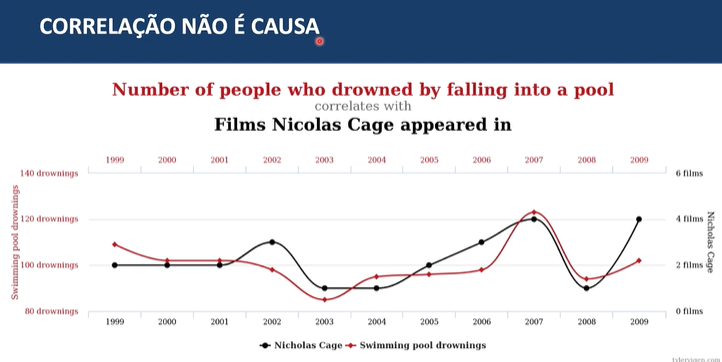

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [ ]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])
dados = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dados['xi-xm']=dados['tamanho']-dados['tamanho'].mean()
dados['yi-ym']=dados['preco']-dados['preco'].mean()
dados

,tamanho,preco,xi-xm,yi-ym
0,30,57000,-14.5,-16250.0
1,39,69000,-5.5,-4250.0
2,49,77000,4.5,3750.0
3,60,90000,15.5,16750.0


Covariancia

In [ ]:
def covariancia(subX,subY,n):
    multSubXY=subX*subY
    multSubXY=multSubXY.sum()
    covariancia=multSubXY/(n-1)
    return covariancia
covariancia(dados['xi-xm'],dados['yi-ym'],dados.shape[0])

178500.0

Coeficiente de correlacao

In [ ]:
def CoefCorr(subX,subY,n):
  return covariancia(subX,subY,n)/(subX.std()*subY.std())
CoefCorr(dados['xi-xm'],dados['yi-ym'],dados.shape[0])

0.9962006267707775

Coeficiente de determinaçao
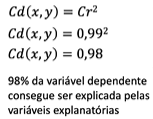

In [ ]:
CoefCorr(dados['xi-xm'],dados['yi-ym'],dados.shape[0])**2

0.9924156887784898

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


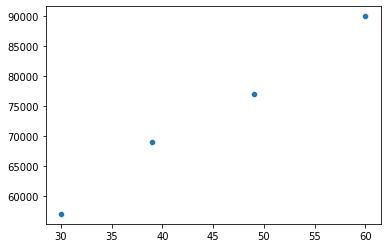

In [ ]:
sns.scatterplot(tamanho,preco)

Exercicios:Hiuse-prices

In [ ]:
house_prices =pd.read_csv('/content/drive/MyDrive/EstatisticaDados/house_prices.csv')
house_prices.cov()['price'].sort_values(ascending=True)

id              -1.770198e+13
zipcode         -1.045072e+06
long             1.118118e+03
waterfront       8.460643e+03
condition        8.687030e+03
lat              1.561742e+04
floors           5.090800e+04
bedrooms         1.052863e+05
view             1.117730e+05
bathrooms        1.484815e+05
grade            2.880265e+05
yr_built         5.824484e+05
yr_renovated     1.864486e+07
sqft_basement    5.261406e+07
sqft_living15    1.472964e+08
sqft_above       1.841014e+08
sqft_living      2.367154e+08
sqft_lot15       8.264591e+08
sqft_lot         1.363437e+09
price            1.347824e+11
Name: price, dtype: float64

In [ ]:
house_prices.corr()['price'].sort_values(ascending=True)

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

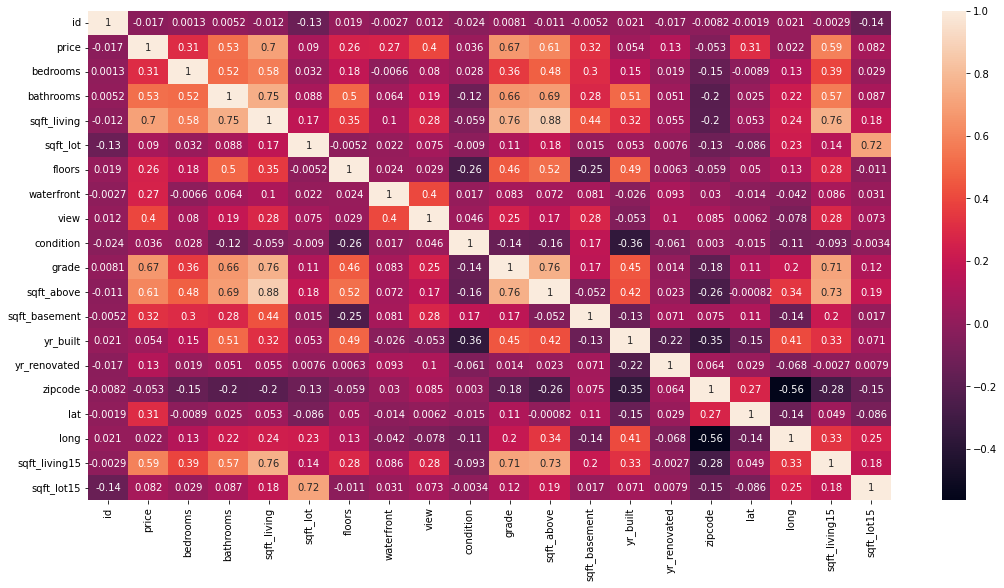

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,9))
sns.heatmap(house_prices.corr(),annot=True)
#living15,above,bathroom,living,grade



# Correlacao com a biblioteca YellowBrick



In [ ]:
from yellowbrick.target import FeatureCorrelation

In [ ]:
house_prices.columns[3:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
grafico = FeatureCorrelation(labels=house_prices.columns[3:])
#grafico.fit(house_prices.iloc[:,3:].values,house_prices.loc[:,['price']].values)

# Regressao Linear

In [ ]:
X=house_prices.loc[:,['sqft_living']].values
Y=house_prices.loc[:,['price']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)
predict=LR.predict(X_test)

y=LR.intercept_+LR.coef_*2000
print(y)

[[517909.57089466]]


MEtricas de erro

In [ ]:
previsoes=LR.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean absolute error  apenas pegas os eeros e aplica

In [ ]:
mean_absolute_error(Y_test,previsoes)

174487.5242626876

mean squared error (erros penalizados)

In [ ]:
mean_squared_error(Y_test,previsoes)

69409593201.32448

root mean squared error (mais real)

In [ ]:
math.sqrt(mean_squared_error(Y_test,previsoes))

263457.0044643423

# Regressao Linear Multipla

In [ ]:
X=house_prices.loc[:,['sqft_living15','sqft_above','bathrooms','sqft_living','grade']]
Y=house_prices.loc[:,['price']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SS=MinMaxScaler()
X=SS.fit_transform(X)


Y=np.log(Y)# regessao linear performa melhor quando normaizado
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
LR2=LinearRegression()
LR2.fit(X_train,Y_train)
predict=LR2.predict(X_test)


math.sqrt(mean_squared_error(Y_test,predict))

0.026528420546208617

In [ ]:
LR2.score(X_test,Y_test)

0.5583948405673191

In [ ]:
X

array([[0.16193426, 0.09758772, 0.125     , 0.06716981, 0.5       ],
       [0.22216486, 0.20614035, 0.28125   , 0.17207547, 0.5       ],
       [0.3994149 , 0.05263158, 0.125     , 0.03622642, 0.41666667],
       ...,
       [0.10686629, 0.08004386, 0.09375   , 0.05509434, 0.5       ],
       [0.17398038, 0.14364035, 0.3125    , 0.09886792, 0.58333333],
       [0.10686629, 0.08004386, 0.09375   , 0.05509434, 0.5       ]])

ANOVA